In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [31]:
playstore = pd.read_csv("data/googleplaystore.csv")
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [32]:
#playstore = pd.read_csv("data/googleplaystore.csv")
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [33]:
# Hapus data yang duplikat berdasarkan kolom App, dengan tetap keep data pertama (hint : gunakan parameter subset)
playstore.drop_duplicates(subset = "App", keep = "first", inplace = True)

In [34]:
playstore.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [35]:
# bagian ini untuk menghapus row 10472 karena nilai data tersebut tidak tersimpan pada kolom yang benar
playstore = playstore.drop([10472], axis=0)

In [36]:
playstore['Category'] = playstore['Category'].astype('category')

In [37]:
playstore.Installs = playstore.Installs.apply(lambda x: x.replace("+",""))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(",",""))

In [38]:
# bagian untuk mengubah tipe data Installs
#playstore.Installs = playstore.Installs.astype("int64")

In [39]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [40]:
# bagian untuk mengubah tipe data Installs
playstore.Installs = playstore.Installs.astype("int64")

In [41]:
# Pada kolom Price, buang karakater $ pada nilai Price lalu ubah tipe datanya menjadi float
playstore.Price = playstore.Price.apply(lambda x: x.replace("$",""))
playstore.Price = playstore.Price.astype("float64")

In [42]:
# Ubah tipe data Reviews, Size, Installs ke dalam tipe data integer
playstore[["Reviews","Size","Installs"]] = playstore[["Reviews","Size","Installs"]].astype("int64")

In [43]:
df2 = playstore.copy()

In [44]:
# Statistik
    # Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
    # Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan 'Jumlah'
    # sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category 
top_category = pd.crosstab(index=df2['Category'], columns='jumlah').sort_values("jumlah", ascending=False).reset_index()

In [45]:
#Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category.
top_category.head()

col_0,Category,jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


In [46]:
top_category.iloc[0,0]

'FAMILY'

In [47]:
top_category.iloc[0,1]

1832

In [48]:
rev_table = df2[["Category","App","Reviews","Rating"]].groupby(["Category","App"]).\
            agg({"Reviews" : "sum",
                "Rating":"mean"}).\
            sort_values(['Reviews','Category'], ascending=False).\
            reset_index().head(10)
rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306.0,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
2,SOCIAL,Instagram,66577313.0,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,GAME,Clash of Clans,44891723.0,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,GAME,Subway Surfers,27722264.0,4.5
7,VIDEO_PLAYERS,YouTube,25655305.0,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,GAME,Clash Royale,23133508.0,4.6


<BarContainer object of 5 artists>

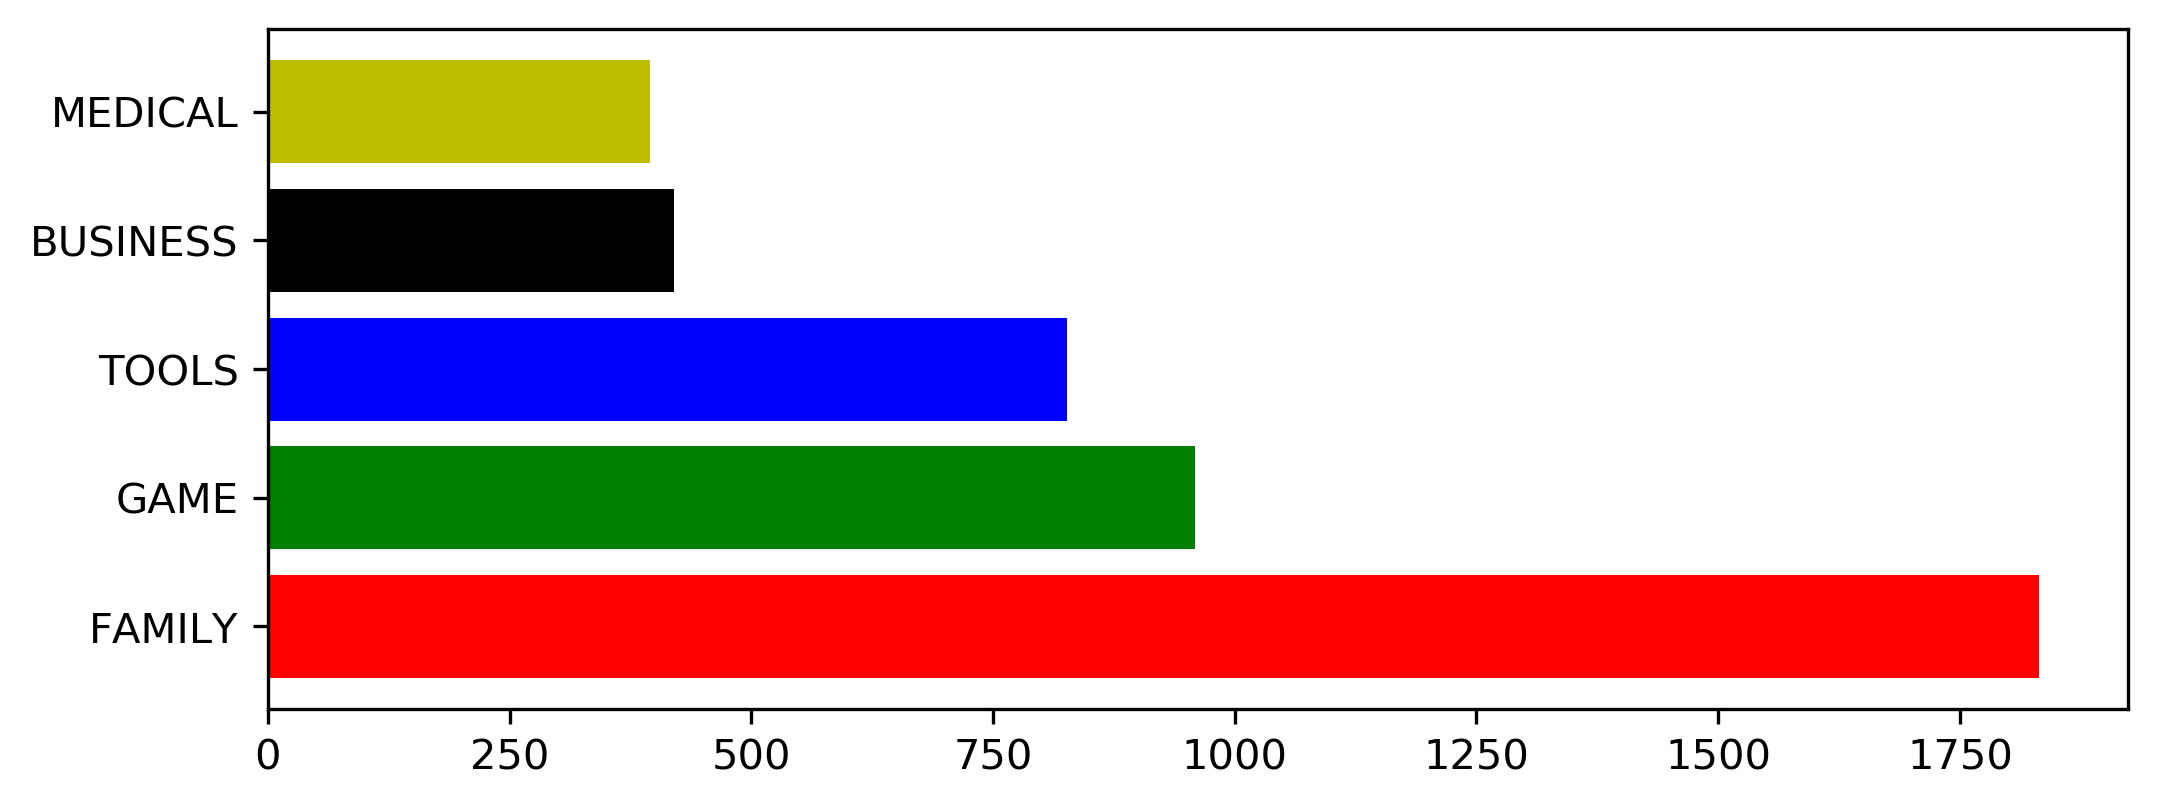

In [49]:
## Bar Plot
    ## Lengkapi tahap agregasi untuk membuat dataframe yang mengelompokkan aplikasi berdasarkan Category
    ## Buatlah bar plot dimana axis x adalah nama Category dan axis y adalah jumlah aplikasi pada setiap kategori, kemudian urutkan dari jumlah terbanyak
cat_order = df2.groupby("Category").agg({'App' : 'count'}).rename({'App' : 'Total'}, axis = 1).sort_values(by = 'Total', ascending = False).head()
X = cat_order.index
Y = cat_order['Total']
my_colors = 'rgbkymc' #red, green, blue, black, yellow, magenta, cyan
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
# isi variabel x dan y yang telah di definisikan di atas
plt.barh(X, Y, color=my_colors)


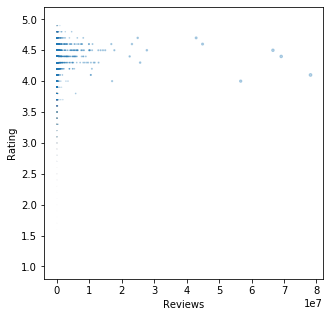

In [50]:
 ## Scatter Plot
# Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
# Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
X = df2["Reviews"].values # axis x
Y = df2["Rating"].values # axis y
area = playstore["Reviews"].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt.scatter(X,Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")



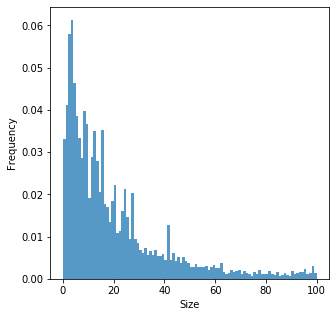

In [51]:
## Histogram Size Distribution
    # Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes) 
    # Histogram yang terbentuk terbagi menjadi 100 bins
X=(df2["Size"]/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")


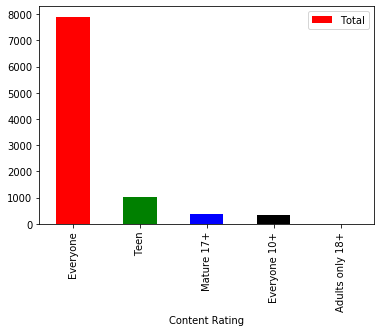

In [27]:
## Buatlah sebuah plot yang menampilkan insight di dalam data
X ='Installs'
Y ='Content Rating'
my_colors = 'rgbkymc'

cat_order = df2.groupby('Content Rating').agg({
    'Installs' : 'count'
}).rename({'Installs' : 'Total'}, axis = 1).sort_values(by='Total', ascending=False).head().plot.bar(color=my_colors)

